In [13]:
"""
Created on Tue Apr  1 08:43:37 2025

@author: david
"""

'\nCreated on Tue Apr  1 08:43:37 2025\n\n@author: david\n'

In [14]:
import numpy as np # importa Numpy
import matplotlib.pyplot as plt # importa Matplotlib
import scipy.ndimage as ndi # importa Scipy per le immagini
import skimage.io as io # importa il modulo Input/Output di SK-Image

import sys
sys.path.append('../Librerie')  # Add the path to the custom library
import mylib as ml  # Import the custom library

Filtraggio guidato. Si vuole realizzare un filtraggio in cui si trasferisce la struttura dei bordi da un’immagine
(detta guida), g, alla sua mappa di segmentazione binaria, x. A tal scopo scrivete una funzione
function y = filtro guidato(x,g,B) 

Applicate la funzione alla mappa mask.png e all’immagine guida guida.png usando B = 10 e ϵ = 2−60.
Visualizzate la mappa in uscita e quella originale. Mostrate a video anche il prodotto xg e yg e un loro
zoom 100 × 100 pixel vicino ad un bordo.

In [15]:
def filtro_guidato(x,g,B):
    #normalizzo maschera e guida in (0,1)
    x = np.float64(x)/255; g = np.float64(g)/255
    
    #calcolo le immagini delle medie locali e delle varianze locali su blocchi BxB
    med_x = ndi.generic_filter(x, np.mean, (B,B))
    med_g = ndi.generic_filter(g, np.mean, (B,B))
    var_x = ndi.generic_filter(x, np.var, (B,B))
    var_g = ndi.generic_filter(g, np.var, (B,B))
    
    #visualizza immagini create
    plt.figure()
    plt.subplot(2,2,1)
    plt.imshow(med_x, clim=None, cmap='gray')
    plt.title('MedX')
    
    plt.subplot(2,2,2)
    plt.imshow(med_g, clim=None, cmap='gray')
    plt.title('MedG')
    
    plt.subplot(2,2,3)
    plt.imshow(var_x, clim=None, cmap='gray')
    plt.title('VarX')
    
    plt.subplot(2,2,4)
    plt.imshow(var_g, clim=None, cmap='gray')
    plt.title('VarG')
    
    #calcolo immagine delle correlazioni locali
    corr_gx = ndi.generic_filter(x*g, np.mean, (B,B))
    plt.figure();
    plt.imshow(corr_gx, cmap='gray')
    plt.title('correlazione locale')
    
    #calcolo uscita filtro come y = μag + μb
    eps = 2**(-60)
    a = ( corr_gx - med_x*med_g ) / ( var_g + eps )
    b =  med_x - a*med_g
    mu_a = ndi.generic_filter(a, np.mean, (B,B))
    mu_b = ndi.generic_filter(b, np.mean, (B,B))
    
    y= mu_a*g + mu_b;
    
    return y;

MAIN

<Figure size 640x480 with 0 Axes>

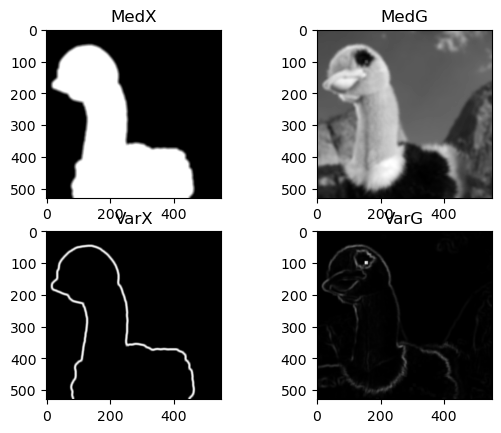

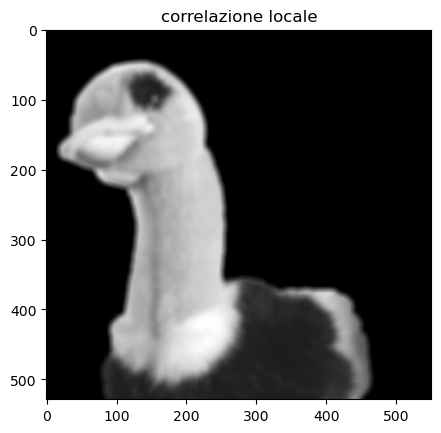

In [16]:
# Applicate la funzione alla mappa mask.png e all’immagine guida guida.png usando B = 10 e ϵ = 2−60.
# Visualizzate la mappa in uscita e quella originale.
plt.figure();
x = ml.leggiJpeg("../immagini/mask.png"); g=ml.leggiJpeg("../immagini/guida.png")
y = filtro_guidato(x, g, 10)

Text(0.5, 1.0, 'Guida in input')

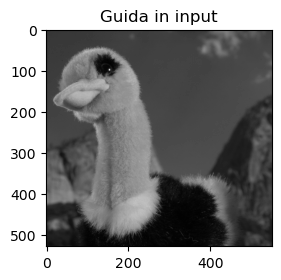

In [17]:
plt.figure();
plt.subplot(1,2,1);
plt.imshow(g, cmap='gray')
plt.title('Guida in input')

Text(0.5, 1.0, 'Guida in output')

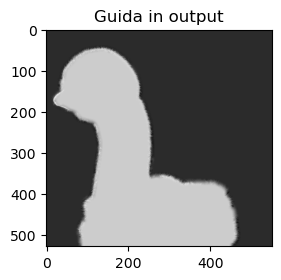

In [18]:
plt.subplot(1,2,2);
plt.imshow(y, cmap='gray')
plt.title('Guida in output')

Text(0.5, 1.0, 'Prodotto X G')

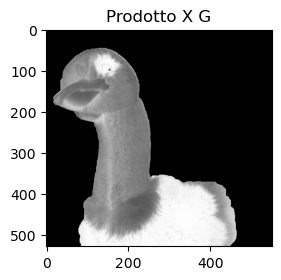

In [19]:
# Mostrate a video anche il prodotto xg e yg e un loro
# zoom 100 × 100 pixel vicino ad un bordo.
prod_xg = x*g
prod_yg = y*g
plt.figure()
plt.subplot(1,2,1)
plt.imshow(prod_xg, cmap='gray')
plt.title('Prodotto X G')

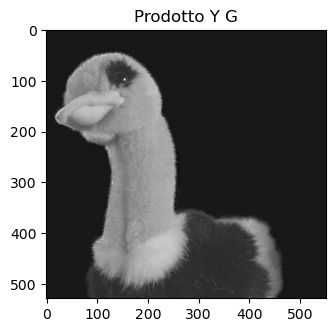

In [20]:
plt.subplot(1,2,2)
plt.imshow(prod_yg, cmap='gray')
plt.title('Prodotto Y G')
plt.tight_layout()

Text(0.5, 1.0, 'zoom X G')

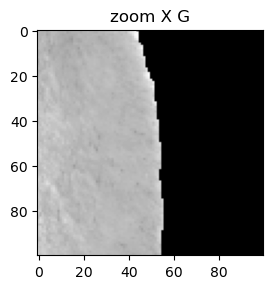

In [21]:
plt.figure()
plt.subplot(1,2,1)
zoom_xg = prod_xg[200:300, 200:300]
plt.imshow(zoom_xg, cmap='gray')
plt.title('zoom X G')

Text(0.5, 1.0, 'zoom Y G')

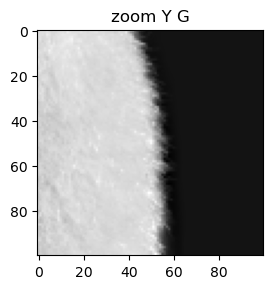

In [22]:
plt.subplot(1,2,2)
zoom_yg = prod_yg[200:300, 200:300]
plt.imshow(zoom_yg, cmap='gray')
plt.title('zoom Y G')